# Capstone: Summarizing Clinical and Demographic Data

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [2]:
pd.set_option('precision',2)

## Load data sets from Excel

In [1]:
df_subject = pd.read_excel('data/capstone1/HIV Boot Camp.xls', sheetname='Patient Information')
df_hiv = pd.read_excel('data/capstone1/HIV Boot Camp.xls', sheetname='HIV RNA')

## Queries on Patient Information table

In [4]:
df_subject.shape

(3748, 10)

In [5]:
df_subject.head(n=10)

,ID,AGE,RACE,SEX,MSM,IDU,UNC Entry to Care Year,Prior HIV Care Elsewhere,On ART,ART Type
0,1,38,AMIND,F,No,No,2012,NO,Yes,Integrase
1,2,44,AMIND,F,No,No,2006,YES,No,NaN
2,3,33,AMIND,F,No,No,2005,NO,No,NaN
3,4,60,AMIND,F,No,Yes,2003,NO,Yes,Integrase
4,6,47,AMIND,F,No,No,2001,YES,Yes,Other
5,7,54,AMIND,F,No,No,2000,YES,Yes,Other
6,8,46,AMIND,F,No,No,2000,NO,No,NaN
7,9,69,AMIND,F,No,No,1999,NO,No,NaN
8,10,41,AMIND,F,No,No,1999,NO,No,NaN
9,11,38,AMIND,F,No,No,1999,NO,No,NaN


In [6]:
df_subject.tail(n=5)

,ID,AGE,RACE,SEX,MSM,IDU,UNC Entry to Care Year,Prior HIV Care Elsewhere,On ART,ART Type
3743,4253,44,WHITE,M,No,No,1990,YES,No,NaN
3744,4254,56,WHITE,M,Yes,Yes,1990,YES,No,NaN
3745,4255,58,WHITE,M,Yes,No,1990,YES,Yes,Other
3746,4257,60,WHITE,M,Yes,No,1989,YES,Yes,Other
3747,4259,57,WHITE,M,Yes,No,1985,NO,Yes,Other


In [7]:
df_subject.sample(n=8)

,ID,AGE,RACE,SEX,MSM,IDU,UNC Entry to Care Year,Prior HIV Care Elsewhere,On ART,ART Type
1899,2100,55,BLACK,M,Unknown,No,2002,YES,No,NaN
2680,3097,55,OTHER,M,Unknown,Unknown,2005,NO,No,NaN
3109,3543,49,WHITE,M,Unknown,Unknown,2006,YES,No,NaN
158,169,31,BLACK,F,No,No,2009,YES,No,NaN
465,508,57,BLACK,F,No,No,2000,YES,Yes,Other
892,1015,58,WHITE,F,No,Yes,2011,YES,Yes,Integrase
3320,3761,55,WHITE,M,Yes,No,2001,NO,No,NaN
1927,2131,36,BLACK,M,Yes,No,2002,YES,Yes,Integrase


### Filtering on age

In [8]:
df_subject[df_subject.AGE >= 85]

,ID,AGE,RACE,SEX,MSM,IDU,UNC Entry to Care Year,Prior HIV Care Elsewhere,On ART,ART Type
202,218,89,BLACK,F,No,No,2007,YES,No,NaN
703,800,89,BLACK,F,No,No,1995,NO,Yes,Other
736,840,88,BLACK,F,No,No,1994,YES,No,NaN
755,869,85,BLACK,F,No,No,1993,YES,No,NaN
917,1042,86,WHITE,F,No,No,2007,YES,No,NaN
1983,2191,85,BLACK,M,No,No,2001,NO,No,NaN
2297,2569,87,BLACK,M,No,No,1998,YES,No,NaN
3321,3762,88,WHITE,M,Yes,No,2001,YES,No,NaN
3606,4102,85,WHITE,M,Unknown,Unknown,1996,YES,No,NaN
3645,4149,86,WHITE,M,No,No,1995,YES,Yes,Other


### Split-Apply-Combine

In [9]:
grouped = df_subject.groupby(['RACE', 'On ART'])
df1 = grouped[['ID']].count()
df1

ID
RACE  On ART      
AMIND No        39
      Yes       24
ASIAN No         3
      Yes        5
BLACK No      1164
      Yes     1037
HISPN No        33
      Yes        6
OTHER No        94
      Yes      118
UNKNW No         5
      Yes       16
WHITE No       601
      Yes      603

#### Working with hierarchical indexes

In [10]:
df1.unstack(level = 1)

ID      
On ART    No   Yes
RACE              
AMIND     39    24
ASIAN      3     5
BLACK   1164  1037
HISPN     33     6
OTHER     94   118
UNKNW      5    16
WHITE    601   603

In [11]:
df1.unstack(level=0)

ID                                    
RACE   AMIND ASIAN BLACK HISPN OTHER UNKNW WHITE
On ART                                          
No        39     3  1164    33    94     5   601
Yes       24     5  1037     6   118    16   603

#### Perhaps surprising

In [12]:
df_subject.groupby(['SEX', 'MSM'])[['ID']].count()

ID
SEX MSM          
F   No       1071
    Unknown    15
    Yes         3
M   No        609
    Unknown   467
    Yes      1583

### Multiple summaries of single variable

In [13]:
grouped = df_subject.groupby(['RACE', 'SEX'])
df2 = grouped[['AGE']].agg(['count', 'mean', 'std'])
df2

AGE              
          count   mean    std
RACE  SEX                    
AMIND F      19  45.26   8.25
      M      44  50.34   9.41
ASIAN F       2  34.00   7.07
      M       6  43.50  16.87
BLACK F     770  51.22  11.16
      M    1431  49.13  12.78
HISPN F      11  46.09   7.67
      M      28  49.04  10.26
OTHER F      51  46.57  11.47
      M     161  46.20  11.21
UNKNW F       5  46.40  12.90
      M      16  44.19  10.60
WHITE F     231  50.66  10.55
      M     973  51.24  11.06

In [14]:
df2.unstack(level=1)

AGE                                  
      count         mean           std       
SEX       F     M      F      M      F      M
RACE                                         
AMIND    19    44  45.26  50.34   8.25   9.41
ASIAN     2     6  34.00  43.50   7.07  16.87
BLACK   770  1431  51.22  49.13  11.16  12.78
HISPN    11    28  46.09  49.04   7.67  10.26
OTHER    51   161  46.57  46.20  11.47  11.21
UNKNW     5    16  46.40  44.19  12.90  10.60
WHITE   231   973  50.66  51.24  10.55  11.06

### Extracting one sub-group

In [15]:
white_female = grouped.get_group(('WHITE', 'F'))
white_female.head()

,ID,AGE,RACE,SEX,MSM,IDU,UNC Entry to Care Year,Prior HIV Care Elsewhere,On ART,ART Type
858,981,47,WHITE,F,No,No,2015,NO,Yes,Integrase
859,982,49,WHITE,F,No,Unknown,2015,YES,Yes,Integrase
860,983,59,WHITE,F,No,No,2015,NO,Yes,Integrase
861,984,51,WHITE,F,No,No,2015,NO,Yes,Integrase
862,985,57,WHITE,F,No,Yes,2015,NO,Yes,NNRTI


## Merging data sets

In [16]:
df_hiv.head()

,ID,Test Month,Test Year,HIV RNA
0,1,10,2011,64360
1,1,1,2012,17848
2,1,5,2012,28773
3,1,7,2012,23085
4,2,7,2005,5871


In [17]:
df_hiv.shape

(12862, 4)

In [18]:
df_subject_hiv = pd.merge(df_subject, df_hiv, on='ID')

In [19]:
df_subject_hiv.shape

(12877, 13)

In [20]:
df_subject_hiv.head()

,ID,AGE,RACE,SEX,MSM,IDU,UNC Entry to Care Year,Prior HIV Care Elsewhere,On ART,ART Type,Test Month,Test Year,HIV RNA
0,1,38,AMIND,F,No,No,2012,NO,Yes,Integrase,10,2011,64360
1,1,38,AMIND,F,No,No,2012,NO,Yes,Integrase,1,2012,17848
2,1,38,AMIND,F,No,No,2012,NO,Yes,Integrase,5,2012,28773
3,1,38,AMIND,F,No,No,2012,NO,Yes,Integrase,7,2012,23085
4,2,44,AMIND,F,No,No,2006,YES,No,NaN,7,2005,5871


### Viral load for one subject

In [21]:
df_subject_hiv[df_subject_hiv.ID == 1]

,ID,AGE,RACE,SEX,MSM,IDU,UNC Entry to Care Year,Prior HIV Care Elsewhere,On ART,ART Type,Test Month,Test Year,HIV RNA
0,1,38,AMIND,F,No,No,2012,NO,Yes,Integrase,10,2011,64360
1,1,38,AMIND,F,No,No,2012,NO,Yes,Integrase,1,2012,17848
2,1,38,AMIND,F,No,No,2012,NO,Yes,Integrase,5,2012,28773
3,1,38,AMIND,F,No,No,2012,NO,Yes,Integrase,7,2012,23085


### Who has the most time series data?

In [22]:
counts = df_subject_hiv.groupby(['ID'])[['HIV RNA']].count()
counts.head()

,HIV RNA
ID,
1,4
2,6
3,3
4,2
6,3


In [23]:
subject_id = counts[counts['HIV RNA'] == counts['HIV RNA'].max()]
subject_id

,HIV RNA
ID,
106,46


In [24]:
subject_id.index[0]

106

In [25]:
(df_subject_hiv[df_subject_hiv.ID == subject_id.index[0]].
    sort_values(['Test Year', 'Test Month']))

,ID,AGE,RACE,SEX,MSM,IDU,UNC Entry to Care Year,Prior HIV Care Elsewhere,On ART,ART Type,Test Month,Test Year,HIV RNA
421,106,68,BLACK,F,No,No,2011,YES,Yes,Other,1,1998,11000
422,106,68,BLACK,F,No,No,2011,YES,Yes,Other,6,1998,9203
423,106,68,BLACK,F,No,No,2011,YES,Yes,Other,9,1998,7147
424,106,68,BLACK,F,No,No,2011,YES,Yes,Other,11,1998,7355
425,106,68,BLACK,F,No,No,2011,YES,Yes,Other,1,1999,12083
426,106,68,BLACK,F,No,No,2011,YES,Yes,Other,3,1999,400
427,106,68,BLACK,F,No,No,2011,YES,Yes,Other,8,1999,1800
428,106,68,BLACK,F,No,No,2011,YES,Yes,Other,8,1999,200000
429,106,68,BLACK,F,No,No,2011,YES,Yes,Other,10,1999,810
430,106,68,BLACK,F,No,No,2011,YES,Yes,Other,12,1999,10000


### Binning into age categories

In [26]:
df_subject_hiv['Age Grpup'] = pd.cut(df_subject_hiv['AGE'], [0, 30, 60, 105])
df_subject_hiv.groupby('Age Grpup')['HIV RNA'].agg(['mean', 'min', 'max'])

,mean,min,max
Age Grpup,,,
"(0, 30]",168012,19,40306875
"(30, 60]",99641,1,21923000
"(60, 105]",115820,7,84545454


## Exercises

**1**. Load the worksheet `CD4 Count` in the spreadsheet `data/HIV Boot Camp.xls` into a data frame named `df_cd4`.

**2**. How many rows and columns are there in df_cd4?

**3**. Show 6 random rows from df_cd4.

**4**. What are the largest and smallest CD4 counts?

**5**. What were the largest and smallest cD4 counts for tests in Dec 2010?

**6**. Sort df_cd4 first by ID (ascending), then by Test Year (descending), then by Test Month (ascending). Show the first 6 rows before and after sorting.

**7**. Create a new column `CD4 Group` that categorizes CD4 counts into the ranges (0-199, 200-500, 500-4000).

**8**. Find the mean and median CD4 count for each subject. Show these values for subjects with IDs in (10, 25, 30, 40, 50, 60).

**9**. Merge `df_subject` with `df_cd4` by joining on `ID` to create a new data frame df_subject_cd4. Show the first 6 rows.

**10**. Find the mean, minimum and maximum CD4 count for subgroups differing in RACE AND SEX.

## Sneak Preview: Visualizing data

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

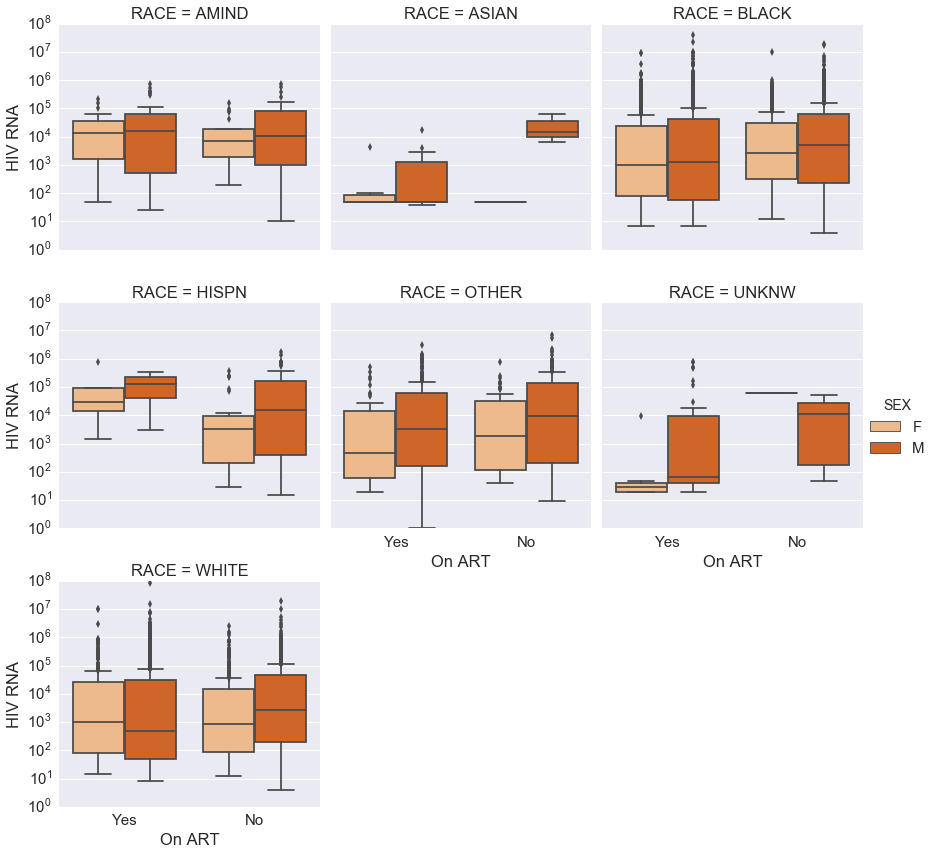

In [28]:
g = sns.factorplot(data=df_subject_hiv, x='On ART', y='HIV RNA', 
                   col='RACE', col_wrap=3, kind='box', hue='SEX',
                   palette='Oranges')
g.axes[0].set_yscale('log')
pass

In [29]:
%load_ext version_information

In [30]:
%version_information

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.0.0
OS Darwin 15.6.0 x86_64 i386 64bit
Sat Aug 27 10:25:14 2016 EDT